In [1]:
import json
from typing import List, Tuple, Dict
import numpy as np


        
def load_annotations_from_json(json_path: str) -> Tuple[List[str], List[List[float]]]:
    """
    Load object labels and bounding boxes from a JSON file
    
    Args:
        json_path: Path to the JSON file
        
    Returns:
        Tuple containing:
        - List of object labels
        - List of bounding boxes
    """
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    objects = data['objects']
    bboxes = data['bboxes']
    
    return objects, bboxes


json_output_path = "annotations.json"


# Loading annotations
loaded_objects, loaded_bboxes = load_annotations_from_json(json_output_path)

# Verify the data
print(f"\nNumber of objects loaded: {len(loaded_objects)}")
print(f"Number of bounding boxes loaded: {len(loaded_bboxes)}")

# Example of checking first few entries
print("\nFirst few entries:")
for obj, bbox in zip(loaded_objects[:3], loaded_bboxes[:3]):
    print(f"Object: {obj}")
    print(f"Bounding box: {bbox}\n")


Number of objects loaded: 176
Number of bounding boxes loaded: 176

First few entries:
Object: AutoSave
Bounding box: [46, 18, 97, 30]

Object: Off
Bounding box: [116, 16, 149, 32]

Object: H
Bounding box: [161, 16, 178, 32]



Processing time: 0.0428 seconds


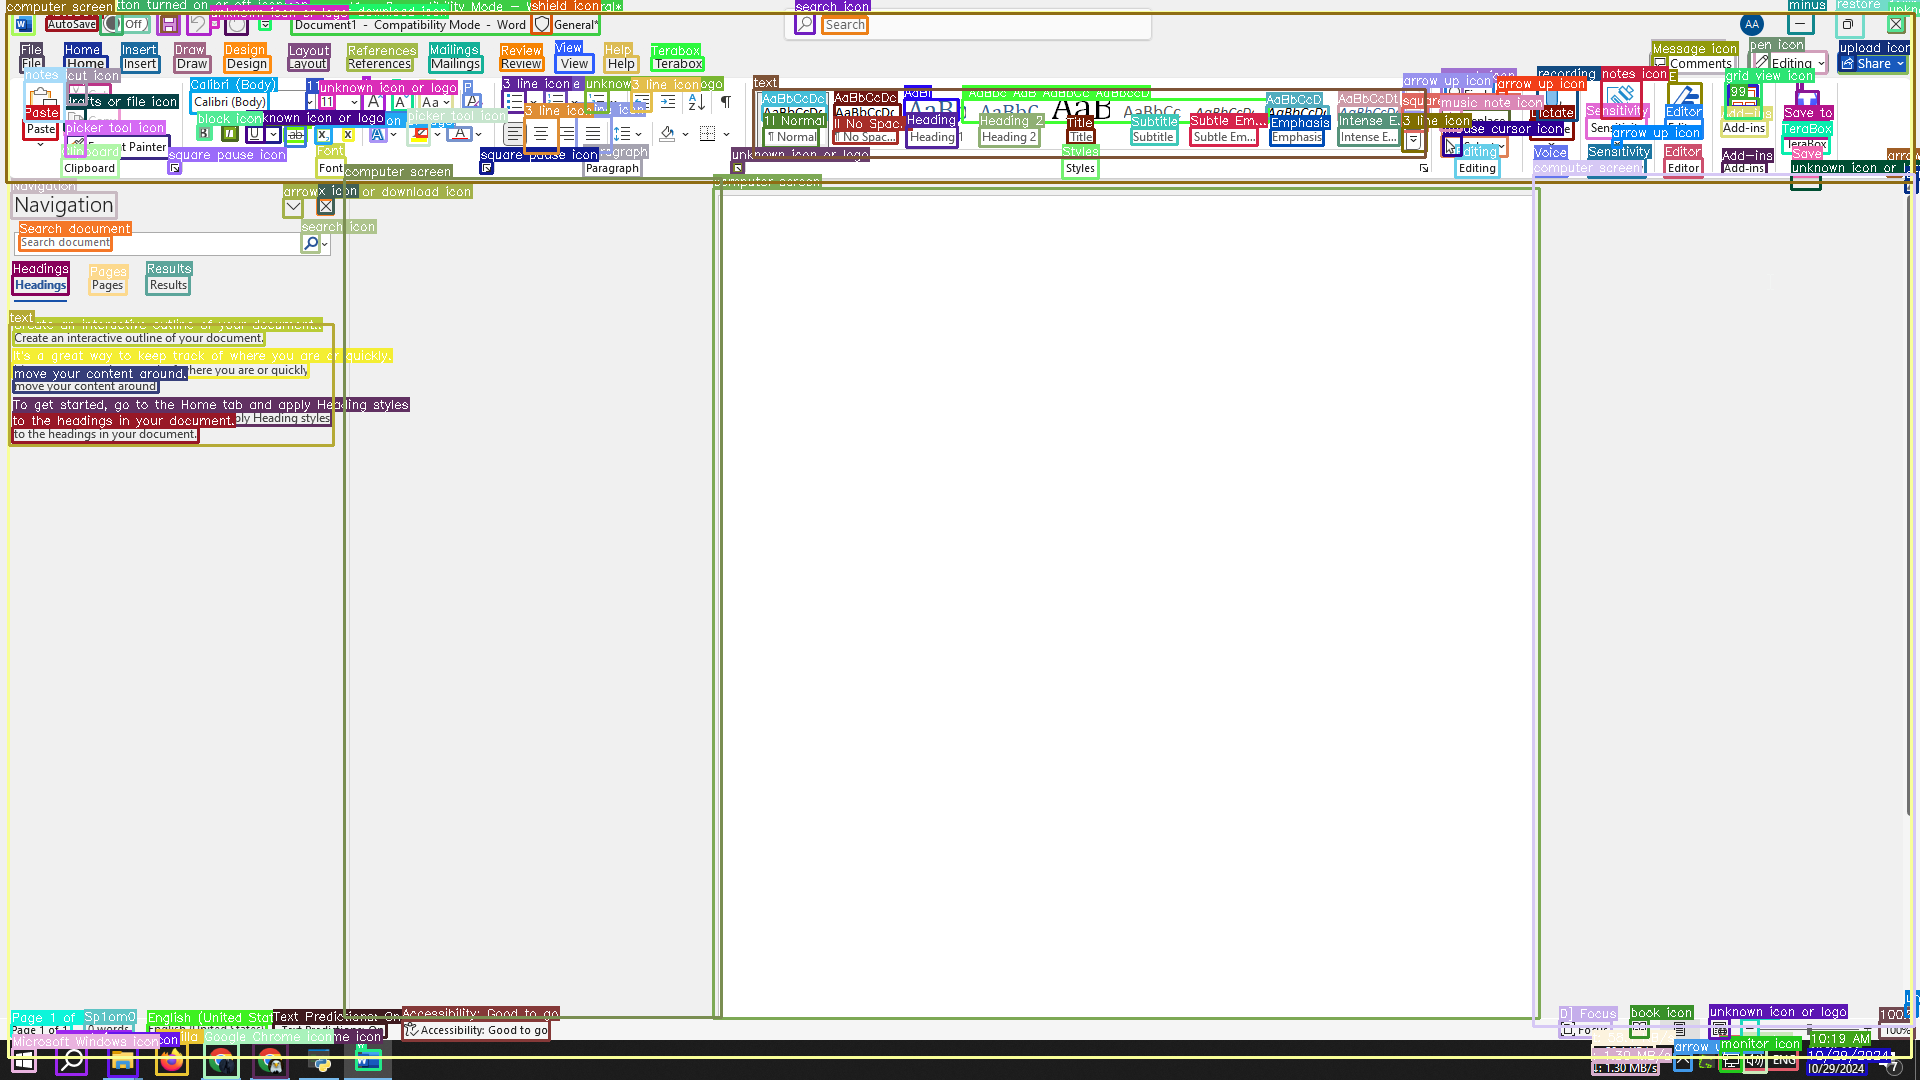

In [6]:
import cv2
import numpy as np
import time
from PIL import Image
def draw_bbox_and_label(img, bbox, label, color):
    """
    Draw bounding box and label using OpenCV with smaller font
    
    Args:
        img: OpenCV image (numpy array)
        bbox: tuple/list of (x1, y1, x2, y2)
        label: string label to display
        color: tuple of (B, G, R) for OpenCV
    """
    x1, y1, x2, y2 = map(int, bbox)
    
    # Draw rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    
    # Use smaller font settings
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.4  # Reduced from 0.6
    thickness = 1
    (label_width, label_height), baseline = cv2.getTextSize(label, font, font_scale, thickness)
    
    # Draw filled rectangle for label background with smaller padding
    cv2.rectangle(img, 
                 (x1, y1 - label_height - 5),  # Reduced padding from 10 to 5
                 (x1 + label_width, y1),
                 color, 
                 -1)
    
    # Put text with adjusted position
    cv2.putText(img, 
                label,
                (x1, y1 - 3),  # Adjusted y position for better alignment
                font,
                font_scale,
                (255, 255, 255),
                thickness)
    
    return img

def process_image_with_bboxes(image_path, objects, bboxes, output_path=None):
    """
    Process image and draw all bounding boxes
    
    Args:
        image_path: path to input image
        objects: list of object labels
        bboxes: list of bounding boxes (x1,y1,x2,y2)
        output_path: path to save output image (optional)
    Returns:
        processed image as numpy array
    """
    # Read and resize image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (1920, 1080))
    
    # Process each bbox
    for obj, bbox in zip(objects, bboxes):
        # Random BGR color
        color = (
            np.random.randint(0, 255),
            np.random.randint(0, 255),
            np.random.randint(0, 255)
        )
        img = draw_bbox_and_label(img, bbox, obj, color)
    
    # Save if output path provided
    if output_path:
        cv2.imwrite(output_path, img)
        
    return img

# test = "left_middle_side"
# test = "center_point"
# # test = "bottom_left_corner"
# # test = "top_right_corner"
# test = "top_middle_side"
# test = 'right_middle_side'
# # test = "top_right_corner"
# # Get data for top_left_corner
# objects = filtered_results[f"{test}"]["objects"]
# bboxes = filtered_results[f"{test}"]["bboxes"]


img_path = r"C:\Users\ALL USER\Desktop\e\ui\word.png"
output_path=False
start = time.time()


img = process_image_with_bboxes(
    img_path,
    loaded_objects,  # Your list of object labels
    loaded_bboxes,       # Your list of bounding boxes
    output_path
)

# img = process_image_with_bboxes(
#     img_path,
#     objects,  # Your list of object labels
#     bboxes,       # Your list of bounding boxes
#     output_path
# )

end = time.time()
print(f"Processing time: {end - start:.4f} seconds")

# Convert the color format from BGR to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the OpenCV image (NumPy array) to a PIL image
pil_image = Image.fromarray(image_rgb)
pil_image

In [7]:
import psutil
import multiprocessing
import platform
import os

def get_cpu_info():
    """
    Get detailed CPU information including physical and logical cores
    
    Returns:
        dict: Dictionary containing CPU information
    """
    cpu_info = {
        # Physical cores (actual CPU cores)
        'physical_cores': psutil.cpu_count(logical=False),
        
        # Logical cores (including hyper-threading)
        'logical_cores': psutil.cpu_count(logical=True),
        
        # Current CPU usage percentage
        'cpu_usage': psutil.cpu_percent(interval=1),
        
        # CPU frequency
        'cpu_freq': psutil.cpu_freq()._asdict() if hasattr(psutil.cpu_freq(), '_asdict') else None,
        
        # Alternative methods for core counting
        'multiprocessing_cores': multiprocessing.cpu_count(),
        
        # System information
        'system': platform.system(),
        'processor': platform.processor(),
        
        # Load average (Unix-like systems only)
        'load_avg': os.getloadavg() if hasattr(os, 'getloadavg') else None
    }
    
    return cpu_info

def print_cpu_info():
    """
    Print formatted CPU information
    """
    info = get_cpu_info()
    
    print("\n=== CPU Information ===")
    print(f"Physical CPU Cores: {info['physical_cores']}")
    print(f"Logical CPU Cores: {info['logical_cores']}")
    print(f"Current CPU Usage: {info['cpu_usage']}%")
    
    if info['cpu_freq']:
        print(f"\nCPU Frequency:")
        print(f"  Current: {info['cpu_freq']['current']:.2f} MHz")
        print(f"  Minimum: {info['cpu_freq']['min']:.2f} MHz")
        print(f"  Maximum: {info['cpu_freq']['max']:.2f} MHz")
    
    print(f"\nSystem: {info['system']}")
    print(f"Processor: {info['processor']}")
    
    if info['load_avg']:
        print(f"\nLoad Average (1, 5, 15 min): {info['load_avg']}")

# Run the information display
if __name__ == "__main__":
    print_cpu_info()


=== CPU Information ===
Physical CPU Cores: 4
Logical CPU Cores: 8
Current CPU Usage: 5.1%

CPU Frequency:
  Current: 1600.00 MHz
  Minimum: 0.00 MHz
  Maximum: 3501.00 MHz

System: Windows
Processor: Intel64 Family 6 Model 58 Stepping 9, GenuineIntel
